In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
import cv2
from matplotlib import pyplot as plt
import os
import tensorflow as tf

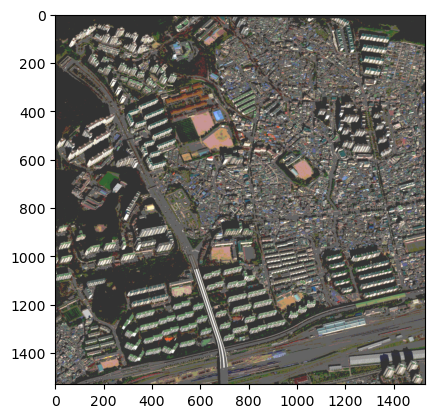

In [2]:

#import pictures and cut into slices
input_path = "../cse-seminar/inputs/tifBusan.tif"
img = cv2.imread(input_path)
img = cv2.convertScaleAbs(img, alpha = 50,beta = 50)
img = cv2.resize(img,(1530,1530))
plt.imshow(img)

In [3]:

# dimensions of the original image
height, width, _ = img.shape

# Define dimensions for each smaller image
small_width = width // 10
small_height = height // 10

# Slice the original image into smaller images
small_images = []
for row in range(10):
    for col in range(10):
        # starting and ending points of each small image
        start_x = col * small_width
        end_x = (col + 1) * small_width
        start_y = row * small_height
        end_y = (row + 1) * small_height

        # Extract from the original image
        small_image = img[start_y:end_y, start_x:end_x]

        # Append small image to list
        small_images.append(small_image)

# save smaller images
output_path = "../cse-seminar/small_images/"
for i, small_image in enumerate(small_images):
    cv2.imwrite( '../cse-seminar/small_images/small_image%d.png' % i, small_image)


In [0]:

# Set input shape
input_shape = (100, 100, 3)  # Assuming RGB images of size 320x320

# Build CNN model
model = Sequential()

# convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten output from previous layer
model.add(Flatten())

# fully connected layer
model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification (high-rise or not)

In [0]:
# Add Metrics
def iou(y_true, y_pred):
    intersection = tf.reduce_sum(tf.multiply(y_true, y_pred))
    union = tf.reduce_sum(tf.subtract(tf.add(y_true, y_pred), tf.multiply(y_true, y_pred)))
    iou_score = tf.divide(intersection, union)
    return iou_score


In [ ]:

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[iou]) #write new metric

In [4]:

# Load dataset and preprocess

folder_path = '../cse-seminar/small_images/'

# Initialize empty list to store image input paths
image_paths = []

# Iterate over files
for filename in os.listdir(folder_path):
    # Check if the file has a common image extension (e.g., jpg, png, etc.)
    if filename.lower().endswith('.png'):
        # Construct the full file path by joining the folder path and filename
        file_path = os.path.join(folder_path, filename)
        # Append the file path to the list of image paths
        image_paths.append(file_path)


images = []

for path in image_paths:
    img = load_img(path, target_size=input_shape[:2])
    img_array = img_to_array(img)
    images.append(img_array)

X = np.array(images)  # Convert into a numpy array

labels = np.array([0, 1])


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_image1.jpg'

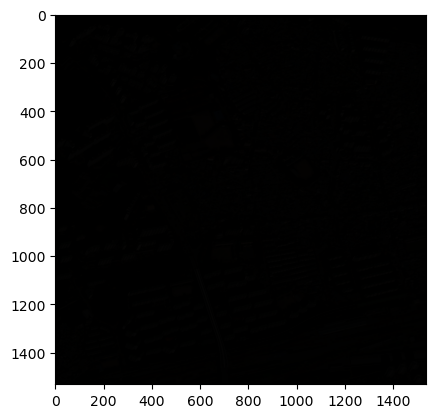

In [13]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)

# predictions

"""
X_test = np.array(test_images)  # Convert the list of test image arrays into a numpy array

predictions = model.predict(X_test)
"""

